In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("../datasets/word2vec/embedding/wikipedia_color_names.csv")

In [4]:
data.head()

,Name,Hex (24 bit),Red (8 bit),Green (8 bit),Blue (8 bit),Hue (degrees),HSL.S (%),"HSL.L (%), HSV.S (%), HSV.V (%)"
0,Absolute zero,#0048BA,0,72,186,217.0,100.0,37.0
1,Acid green,#B0BF1A,176,191,26,65.0,76.0,43.0
2,Aero,#7CB9E8,124,185,232,206.0,70.0,70.0
3,Aero blue,#C9FFE5,201,255,229,151.0,100.0,89.0
4,African violet,#B284BE,178,132,190,288.0,31.0,63.0


In [9]:
mod = data.iloc[:, [0,2,3,4]]

In [10]:
X, y = mod.iloc[:, 1:].values, mod.iloc[:, 0].values 

In [11]:
X

array([[  0,  72, 186],
       [176, 191,  26],
       [124, 185, 232],
       ...,
       [  0,  20, 168],
       [ 44,  22,   8],
       [ 57, 167, 142]])

In [12]:
y

array(['Absolute zero', 'Acid green', 'Aero', ..., 'Zaffre',
       'Zinnwaldite brown', 'Zomp'], dtype=object)

In [20]:
color = X[y == "Red"]

distances = np.sum((X - color)**2, axis=1)

near = distances.argsort()[:10]

y[near]

colors_rgb = X[near]

In [27]:
colors_rgb.shape

(10, 3)

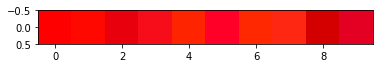

In [28]:
plt.imshow(colors_rgb.reshape(1, -1, 3))

In [48]:
c1, c2, c3 = "Burnt orange", "Pink", "Blue"

In [49]:
relation = X[y == c1] - X[y == c2]

In [50]:
relation

array([[ -51, -107, -203]])

In [51]:
output = X[y == c3] 

In [52]:
output

array([[  0,   0, 255]])

In [53]:
def near_color(color):
    distances = np.sum((X - color)**2, axis=1)

    near = distances.argsort()[:10]

    return y[near], X[near]

In [54]:
y_col, x_col = near_color(output)

([<matplotlib.axis.YTick at 0x7f9c02aff820>,
 [Text(0, 0, 'Blue'),
  Text(0, 0, 'Bluebonnet'),
  Text(0, 0, 'Medium blue'),
  Text(0, 0, 'Electric ultramarine'),
  Text(0, 0, 'Blue (RYB)'),
  Text(0, 0, 'Interdimensional Blue'),
  Text(0, 0, 'Palatinate blue'),
  Text(0, 0, 'Han purple'),
  Text(0, 0, 'Zaffre'),
  Text(0, 0, 'Blue (Pantone)')])

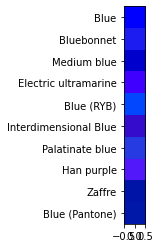

In [55]:
plt.imshow(x_col.reshape(-1, 1, 3))
plt.yticks(range(10), y_col)